In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_fwf("/content/FactTable.rpt")

In [4]:
print(df.head())

                         Country_Code Indicator_Code         Year  \
0  ------------ ---------------------------------...  -----------   
1                           AFG          DT.GPA.OFFT         1970   
2                           AFG          DT.GPA.OFFT         1971   
3                           AFG          DT.GPA.OFFT         1972   
4                           AFG          DT.GPA.OFFT         1973   

                                Debt_Value  
0  ---------------------------------------  
1                                     0.00  
2                                     0.00  
3                                     0.00  
4                                     0.00  


In [9]:
df = df[~df.apply(lambda row: row.astype(str).str.contains('-{3,}').any(), axis=1)]

In [10]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

/tmp/ipython-input-242626680.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [11]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Debt_Value'] = pd.to_numeric(df['Debt_Value'], errors='coerce')

In [12]:
print(df.dtypes)
print(df.head())

Country_Code Indicator_Code     object
Year                           float64
Debt_Value                     float64
dtype: object
  Country_Code Indicator_Code    Year  Debt_Value
1    AFG          DT.GPA.OFFT  1970.0         0.0
2    AFG          DT.GPA.OFFT  1971.0         0.0
3    AFG          DT.GPA.OFFT  1972.0         0.0
4    AFG          DT.GPA.OFFT  1973.0         0.0
5    AFG          DT.GPA.OFFT  1974.0         0.0


In [13]:
df.to_csv("clean_debt_data.csv", index=False)

In [14]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 1131933 entries, 1 to 1131933
Data columns (total 3 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Country_Code Indicator_Code  1131933 non-null  object 
 1   Year                         1131932 non-null  float64
 2   Debt_Value                   1131932 non-null  float64
dtypes: float64(2), object(1)
memory usage: 34.5+ MB


,0
Country_Code Indicator_Code,0
Year,1
Debt_Value,1


In [15]:
df.columns

Index(['Country_Code Indicator_Code', 'Year', 'Debt_Value'], dtype='object')

In [17]:
df[['Country_Code', 'Indicator_Code']] = (
    df['Country_Code Indicator_Code']
    .str.strip()
    .str.split(r'\s+', n=1, expand=True)
)

In [18]:
df.head()
df.columns

Index(['Country_Code Indicator_Code', 'Year', 'Debt_Value', 'Country_Code',
       'Indicator_Code'],
      dtype='object')

In [19]:
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df["Debt_Value"] = pd.to_numeric(df["Debt_Value"], errors="coerce")

df = df.dropna(subset=["Country_Code", "Indicator_Code", "Year", "Debt_Value"])

In [20]:
df["Country_Code"].unique()[:5]
df["Indicator_Code"].unique()[:5]

array(['DT.GPA.OFFT', 'DT.GPA.PRVT', 'DT.GRE.DPPG', 'DT.GRE.OFFT',
       'DT.GRE.PRVT'], dtype=object)

In [23]:
df.columns

Index(['Year', 'Debt_Value', 'Country_Code', 'Indicator_Code'], dtype='object')

In [22]:
df.drop('Country_Code Indicator_Code', axis=1, inplace=True)

/tmp/ipython-input-1002228221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Country_Code Indicator_Code', axis=1, inplace=True)


<Axes: title={'center': 'India External Debt Trend'}, xlabel='Year'>

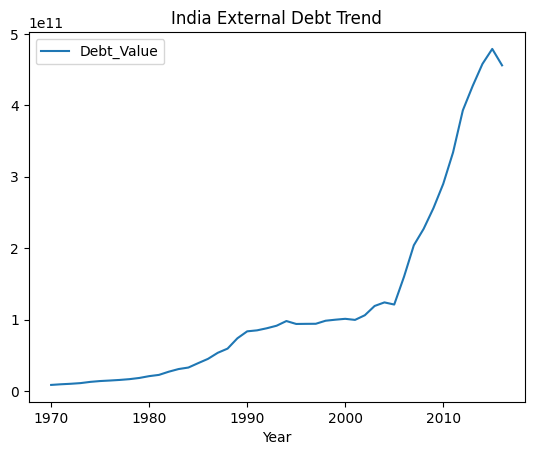

In [24]:
subset = df[
    (df["Country_Code"] == "IND") &
    (df["Indicator_Code"] == "DT.DOD.DECT.CD")
]

subset.plot(x="Year", y="Debt_Value", kind="line", title="India External Debt Trend")

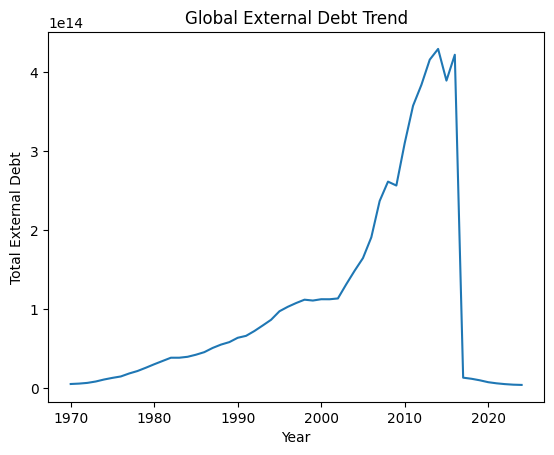

In [25]:
global_trend = df.groupby('Year')['Debt_Value'].sum()

plt.figure()
plt.plot(global_trend.index, global_trend.values)
plt.title('Global External Debt Trend')
plt.xlabel('Year')
plt.ylabel('Total External Debt')
plt.show()

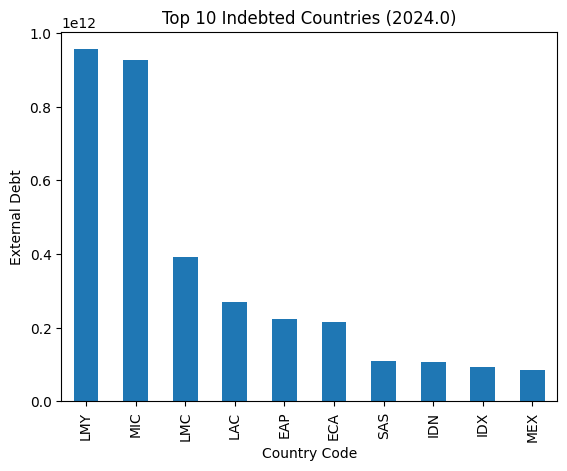

In [26]:
latest_year = df['Year'].max()

top10 = (
    df[df['Year'] == latest_year]
    .groupby('Country_Code')['Debt_Value']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure()
top10.plot(kind='bar')
plt.title(f'Top 10 Indebted Countries ({latest_year})')
plt.xlabel('Country Code')
plt.ylabel('External Debt')
plt.show()

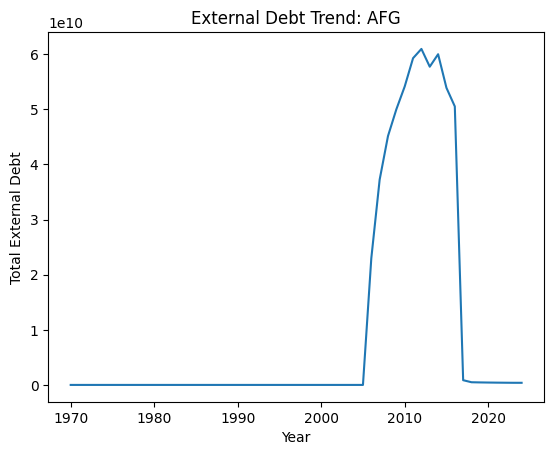

In [28]:
afg_trend = (
    df[df['Country_Code'] == 'AFG']
    .groupby('Year')['Debt_Value']
    .sum()
    .reset_index()
)

plt.figure()
plt.plot(afg_trend['Year'], afg_trend['Debt_Value'])
plt.title('External Debt Trend: AFG')
plt.xlabel('Year')
plt.ylabel('Total External Debt')
plt.show()

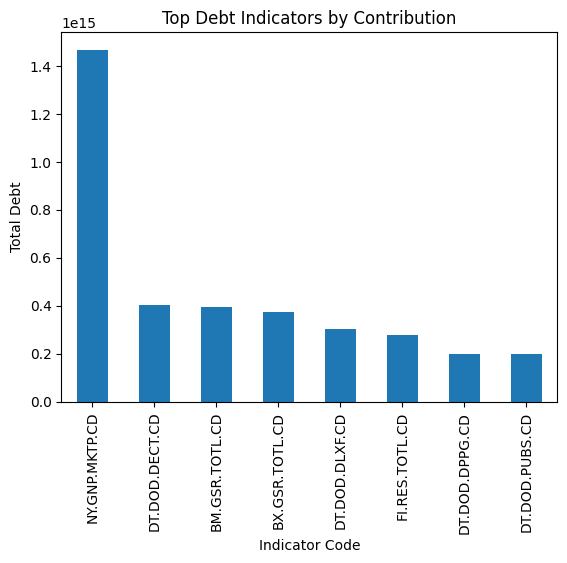

In [29]:
indicator_debt = (
    df.groupby('Indicator_Code')['Debt_Value']
    .sum()
    .sort_values(ascending=False)
    .head(8)
)

plt.figure()
indicator_debt.plot(kind='bar')
plt.title('Top Debt Indicators by Contribution')
plt.xlabel('Indicator Code')
plt.ylabel('Total Debt')
plt.show()

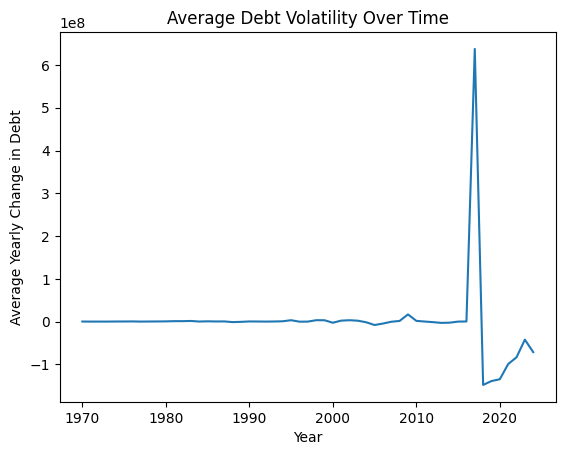

In [30]:
df_sorted = df.sort_values(['Country_Code', 'Year'])
df_sorted['Debt_Change'] = df_sorted.groupby('Country_Code')['Debt_Value'].diff()

volatility = df_sorted.groupby('Year')['Debt_Change'].mean()

plt.figure()
plt.plot(volatility.index, volatility.values)
plt.title('Average Debt Volatility Over Time')
plt.xlabel('Year')
plt.ylabel('Average Yearly Change in Debt')
plt.show()